In [9]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline


from models.wimp import SIWIMP
from models.wimp import SIWIMP_Helm
from models.migdal import MIGDAL
from models.inelastic import SIInel
from detectors.nai import DAMA, NA, Io
from veldists import VelDist
from constants import *

In [10]:
## Step 1
DetNA = NA()
DetI = Io()
Det = DAMA()

Model1 = SIWIMP()
Model2 = SIInel()
Model3 = MIGDAL()
Dist = VelDist("modSHM",0.3) # standard halo model
Dist2 = VelDist("modShards",0.3) # standard halo model + shards
Dist3 = VelDist("avSHM",0.3)

In [ ]:
## Step 2 
E = np.arange(0,16,0.1) # observed energy, units of keV_ee
plt.plot(E,[Det.dRdE(e,Model1.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist) for e in E]) ## note here you can pass the model variables as kwargs
plt.plot(E,[Det.dRdE(e,Model2.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist,delta=20*keV) for e in E]) ## note here you can pass the model variables as kwargs
plt.legend(["SHM, delta=0","SHM, delta=20 keV"])
plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
plt.xlabel(r"Energy [keV$_{\rm ee}$]")
plt.xlim(0,16)
plt.ylim(0,0.026)
plt.grid()
plt.show()

In [11]:
E = np.arange( 0, 16, 0.1) # observed energy, units of keV_ee
# E = np.logspace(-2,4, 100)
mX = 1*GeV; sig = 1e-36; VelDist = Dist3

res  = [integrate.quad(lambda E2: Det.Res(e,E2) ,0 ,Det.Emax()*2, points = Det.ROI(), limit=int(1e8))[0] for e in E]
effs = [Det.Eff(e) for e in E]
true = [Det.dRdE_True(e,Model3.dRdER, mX=mX, sig=sig, VelDist=Dist3, NR=False) for e in E]


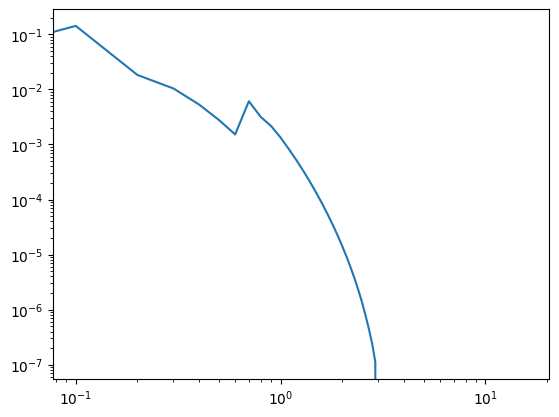

In [12]:
plt.plot(E, np.array(true))#*effs*res)
# plt.plot(E, np.array(trueIo))#*effs*res)
# plt.plot(E, np.array(trueNA))#*effs*res)
# plt.plot(E, np.array(dRdE)*effs)
# plt.xlim(0,16)
plt.xscale('log')
plt.yscale('log')
# plt.ylim(0,0.026)

In [ ]:
import tqdm.autonotebook as tqdm
E = [0.5]
dRdE = []
for e in tqdm.tqdm(E):
    dRdE .append(Det.dRdE(e,Model3.dRdER, mX=mX, sig=sig, VelDist=Dist3, NR=False))


In [ ]:
E = np.logspace(-3,1, base=10, num=100)
# plt.plot(E, [Model3.dRdER(Det.Nuclei()[0], e, mX, sig, VelDist) for e in E])#*effs*res)
# plt.plot(E, [Det.dRdE_True(e,Model3.dRdER, mX=mX, sig=sig, VelDist=Dist3, NR=False) for e in E])#*effs*res)
plt.plot(E, [Det.dRdE(e,Model3.dRdER, mX=mX, sig=sig, VelDist=Dist3, NR=False) for e in E])#*effs*res)
# plt.plot(E, np.array(trueIo))#*effs*res)
# plt.plot(E, np.array(trueNA))#*effs*res)
# plt.plot(E, np.array(dRdE)*effs)
# plt.xlim(0,16)
plt.xscale('log')
plt.yscale('log')
# plt.ylim(0,0.026)

In [ ]:
# E = np.arange(0,16,0.1) # observed energy, units of keV_ee
# plt.plot(E,[Det.dRdE(e,Model1.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist) for e in E]) ## note here you can pass the model variables as kwargs
# plt.plot(E,[Det.dRdE(e,Model1.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist2) for e in E]) ## note here you can pass the model variables as kwargs
# plt.legend(["SHM","SHM+Shards"])
# plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
# plt.xlabel(r"Energy [keV$_{\rm ee}$]")
# plt.xlim(0,16)
# plt.ylim(0,0.026)
# plt.grid()
# plt.show()

In [ ]:
E = np.arange(0,16,0.01) # observed energy, units of keV_ee
plt.plot(E,[Det.dRdE_True(e,Model3.dRdER,mX=1*GeV,sig=1.1E-36,VelDist=Dist3, NR=False) for e in E]) ## note here you can pass the model variables as kwargs
plt.plot(E,[DetNA.dRdE_True(e,Model3.dRdER,mX=1*GeV,sig=1.1E-36,VelDist=Dist3, NR=False) for e in E]) ## note here you can pass the model variables as kwargs
plt.plot(E,[DetI.dRdE_True(e,Model3.dRdER,mX=1*GeV,sig=1.1E-36,VelDist=Dist3, NR=False) for e in E]) ## note here you can pass the model variables as kwargs
# plt.plot(E,[Det.dRdE(e,Model1.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist2) for e in E]) ## note here you can pass the model variables as kwargs
plt.legend(["AvSHM"])
plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
plt.xlabel(r"Energy [keV$_{\rm ee}$]")
# plt.xlim(0,16)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,1e1)
plt.grid()
plt.show()